<a href="https://colab.research.google.com/github/ingridmidory/Machine-Learning-with-Python-/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import statistics
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [ ]:
df_def = pd.read_csv('/content/Default.csv')
df_def

#lo siguiente nos sirva para definir las variables dependiente e independiente
x = df_def [["balance"]]
y = df_def [["default"]]

df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [ ]:
log_reg = LogisticRegression() #llamar la clase
log_reg.fit(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred = log_reg.predict(x) #definimos un vector, en este caso y_pred
y_pred
df_def["y_pred"] = y_pred
df_def

probs = log_reg.predict_proba(x)
log_reg.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
np.set_printoptions(threshold=np.inf)
f= np.column_stack((probs[:,:], y_pred))
f


array([[0.9986943185421062, 0.0013056814578938022, 'No'],
       [0.9978874024584471, 0.002112597541552957, 'No'],
       [0.991405251861769, 0.008594748138231037, 'No'],
       [0.9995655624663532, 0.00043443753364676266, 'No'],
       [0.9982230403332846, 0.0017769596667153906, 'No'],
       [0.9962958431002894, 0.0037041568997105943, 'No'],
       [0.9977885658381839, 0.0022114341618161204, 'No'],
       [0.9979838230037251, 0.0020161769962749316, 'No'],
       [0.9861670065786792, 0.013832993421320813, 'No'],
       [0.9999763311780543, 2.366882194572875e-05, 'No'],
       [0.9999763311780543, 2.366882194572875e-05, 'No'],
       [0.9809123440382541, 0.019087655961745865, 'No'],
       [0.9999128538813823, 8.714611861772448e-05, 'No'],
       [0.9993348970092997, 0.0006651029907003716, 'No'],
       [0.9893470569959614, 0.010652943004038634, 'No'],
       [0.9998857902374235, 0.00011420976257652537, 'No'],
       [0.9999763311780543, 2.366882194572875e-05, 'No'],
       [0.99956962

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, confusion_matrix
cm = confusion_matrix(y, y_pred)


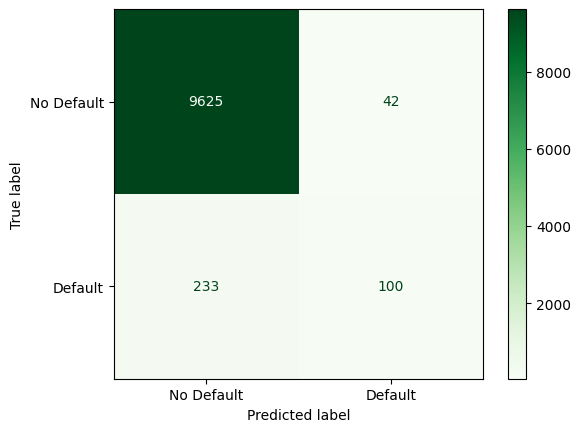

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Default','Default'])
disp.plot(cmap = plt.cm.Greens)
plt.show()

In [ ]:
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
sensitivity



0.3003003003003003

In [ ]:
cm.ravel()

array([9625,   42,  233,  100])

In [ ]:
tn, fp, fn, tp = cm.ravel()

tn = cm.ravel()[0] #forma de llamar al atributo de mi matriz de confusion
f = cm.ravel()[1]
fn = cm.ravel()[2]
tp = cm.ravel()[3]

In [ ]:
specficity = tn / (tn + fp)
specficity

0.9956553222302679

In [ ]:
probabilities= log_reg.predict_proba(x)[:,0]
probabilities



array([0.99869432, 0.9978874 , 0.99140525, 0.99956556, 0.99822304,
       0.99629584, 0.99778857, 0.99798382, 0.98616701, 0.99997633,
       0.99997633, 0.98091234, 0.99991285, 0.9993349 , 0.98934706,
       0.99988579, 0.99997633, 0.99956963, 0.9996576 , 0.9903358 ,
       0.99991665, 0.99552125, 0.99219157, 0.99919278, 0.99834037,
       0.99740018, 0.99918827, 0.93408233, 0.99930132, 0.98895762,
       0.99964048, 0.99972071, 0.99941011, 0.99641566, 0.94381118,
       0.91716745, 0.99893731, 0.99983653, 0.99859692, 0.99914186,
       0.99714411, 0.99764132, 0.98685665, 0.99992041, 0.79525084,
       0.99977597, 0.97896513, 0.98010057, 0.99784361, 0.99736462,
       0.99947524, 0.97330888, 0.91460123, 0.99659835, 0.99997633,
       0.97161218, 0.9743489 , 0.90040425, 0.96523964, 0.99964585,
       0.99840274, 0.99894839, 0.99997633, 0.92479329, 0.994582  ,
       0.97039789, 0.99266272, 0.99997633, 0.99723821, 0.99894449,
       0.99936694, 0.99974895, 0.95087364, 0.87800659, 0.99737

Aqui se ha calculado

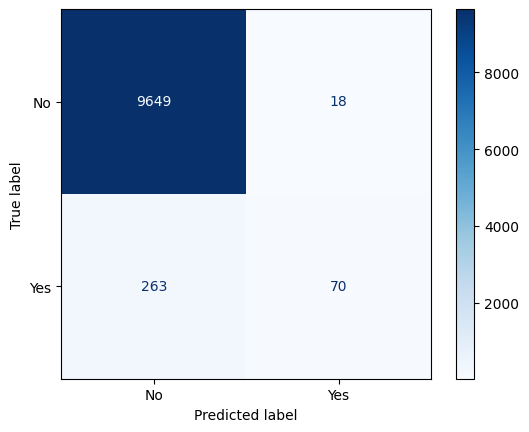

In [ ]:
probabilities= log_reg.predict_proba(x)[:,1]
probabilities

threshold = 0.63

predictions = (probabilities > threshold).astype(int)
predictions = pd.Series(predictions).map ({0: 'No', 1:'Yes'})


cm = confusion_matrix(y, predictions, labels=['No', 'Yes'])
cm

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap = plt.cm.Blues)
#plt.show()
#cm

In [ ]:
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
sensitivity

print ("Sensitivity: ", sensitivity)

Sensitivity:  0.21021021021021022


In [ ]:
presicion = (tp + tn) / 10000
presicion

0.9719

In [ ]:
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specficity = tn / (tn + fp)

print ("Sensitivity: ", sensitivity )
print ("Specficity: ", specficity)

Sensitivity:  0.21021021021021022
Specficity:  0.9981379952415433
